# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [34]:
# Import the required libraries and dependencies

# Import libraries and dependencies
# Import the Pandas library.
import pandas as pd
from pandas import read_csv as rcsv
from pandas import DataFrame as wdf
from pandas import concat as ccat

import seaborn as sns
import numpy as np

# Import the Path module from the Pathlib library.
from pathlib import Path

# Import the %matplotlib inline dependency.
import matplotlib.pyplot as plt
%matplotlib inline




# bitstamp_index_date.index.names = [‘Date']
# bitstamp_sliced = bitstamp_drop_na.loc[:,['Close']]  


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [35]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Set path to CSV file
whale_navs_csv=Path('Resources/whale_navs.csv')
# read in csv file, generate dataframe setting the DatetimeIndex with 'date' as as index. 
whale_navs_df=rcsv(
    whale_navs_csv,
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)
# Review the first 5 rows of the DataFrame
display(whale_navs_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [36]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns=whale_navs_df.pct_change().dropna()
display(daily_returns.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns of Four Funds vs. S&P 500'}, xlabel='date'>

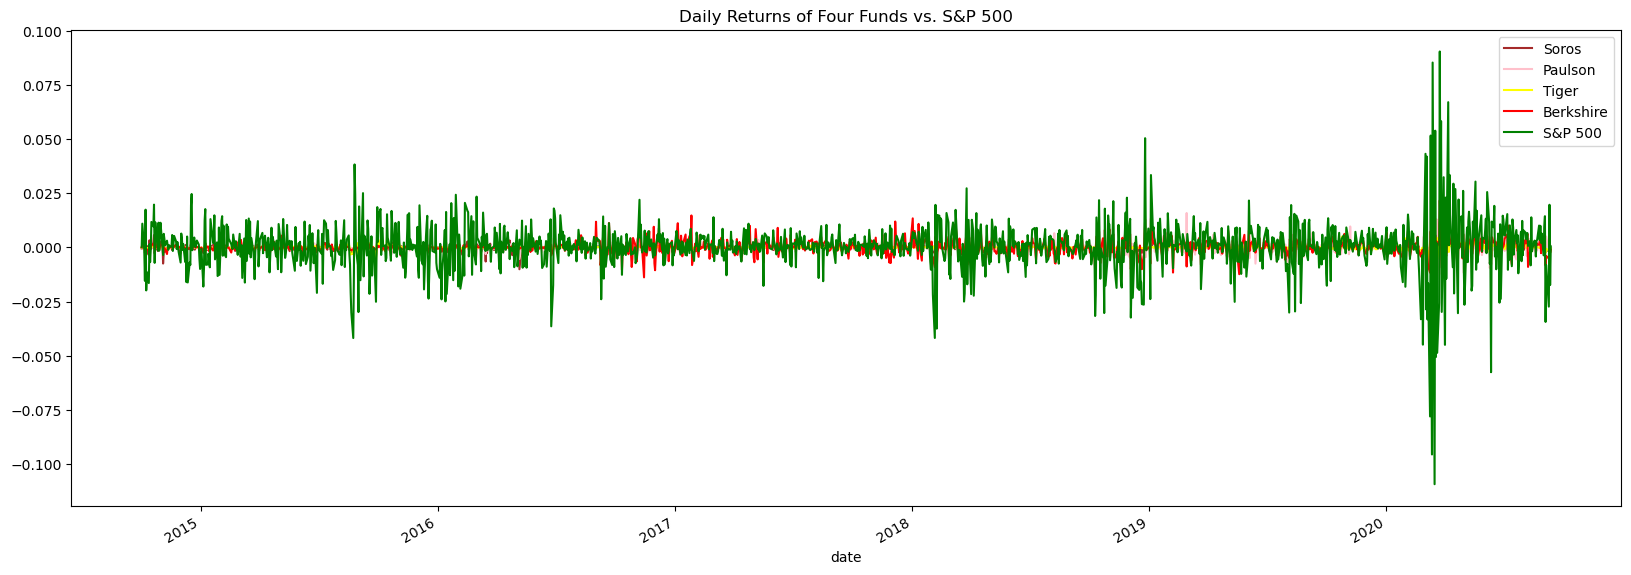

In [37]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns['SOROS FUND MANAGEMENT LLC'].plot(legend=True, figsize=(20,7), title='Daily Returns of Four Funds vs. S&P 500', color='brown', label='Soros')
daily_returns['PAULSON & CO.INC.'].plot(legend=True,figsize=(20,7), color='pink', label='Paulson')
daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(legend=True,figsize=(20,7), color='yellow', label='Tiger')
daily_returns['BERKSHIRE HATHAWAY INC'].plot(legend=True,figsize=(20,7), color='red', label='Berkshire')
daily_returns['S&P 500'].plot(legend=True,figsize=(20,7), color='green', label='S&P 500')


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [38]:
# Calculate the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame

cumulative_returns=(1+daily_returns).cumprod()-1
display(cumulative_returns.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.000609,0.000518,0.000407,0.001420,0.011165
2014-10-06,0.003066,0.000510,0.000474,0.001688,0.009982
2014-10-07,0.000437,0.000193,0.000265,0.001100,-0.005608
2014-10-08,0.000828,0.000563,0.000507,0.001943,0.011783


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulativea Returns of Four Funds vs. S&P 500'}, xlabel='date'>

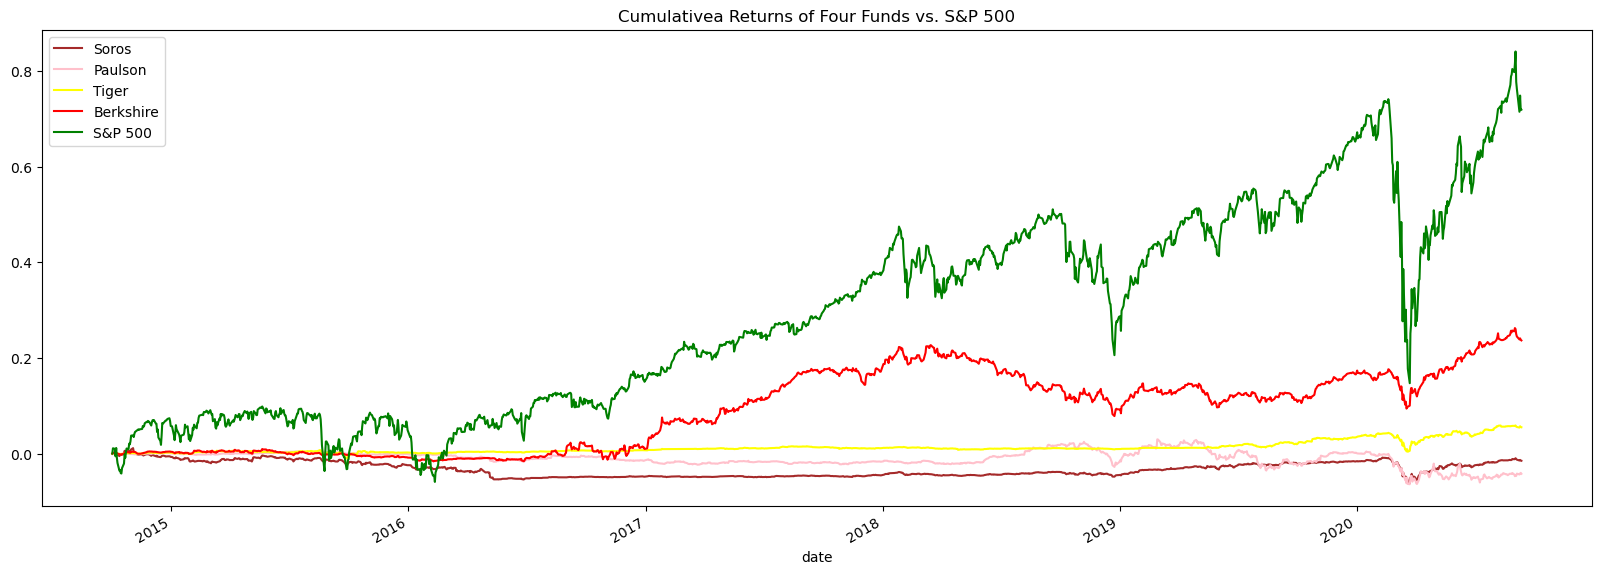

In [39]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns['SOROS FUND MANAGEMENT LLC'].plot(legend=True, figsize=(20,7), title='Cumulativea Returns of Four Funds vs. S&P 500', color='brown', label='Soros')
cumulative_returns['PAULSON & CO.INC.'].plot(legend=True,figsize=(20,7), color='pink', label='Paulson')
cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(legend=True,figsize=(20,7), color='yellow', label='Tiger')
cumulative_returns['BERKSHIRE HATHAWAY INC'].plot(legend=True,figsize=(20,7), color='red', label='Berkshire')
cumulative_returns['S&P 500'].plot(legend=True,figsize=(20,7), color='green', label='S&P 500')

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** 
### Based on the cumulative return data and the visualization, all four funds fail to outperform the S&P 500 Index.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulativea Returns- Four Funds vs. S&P 500'}>

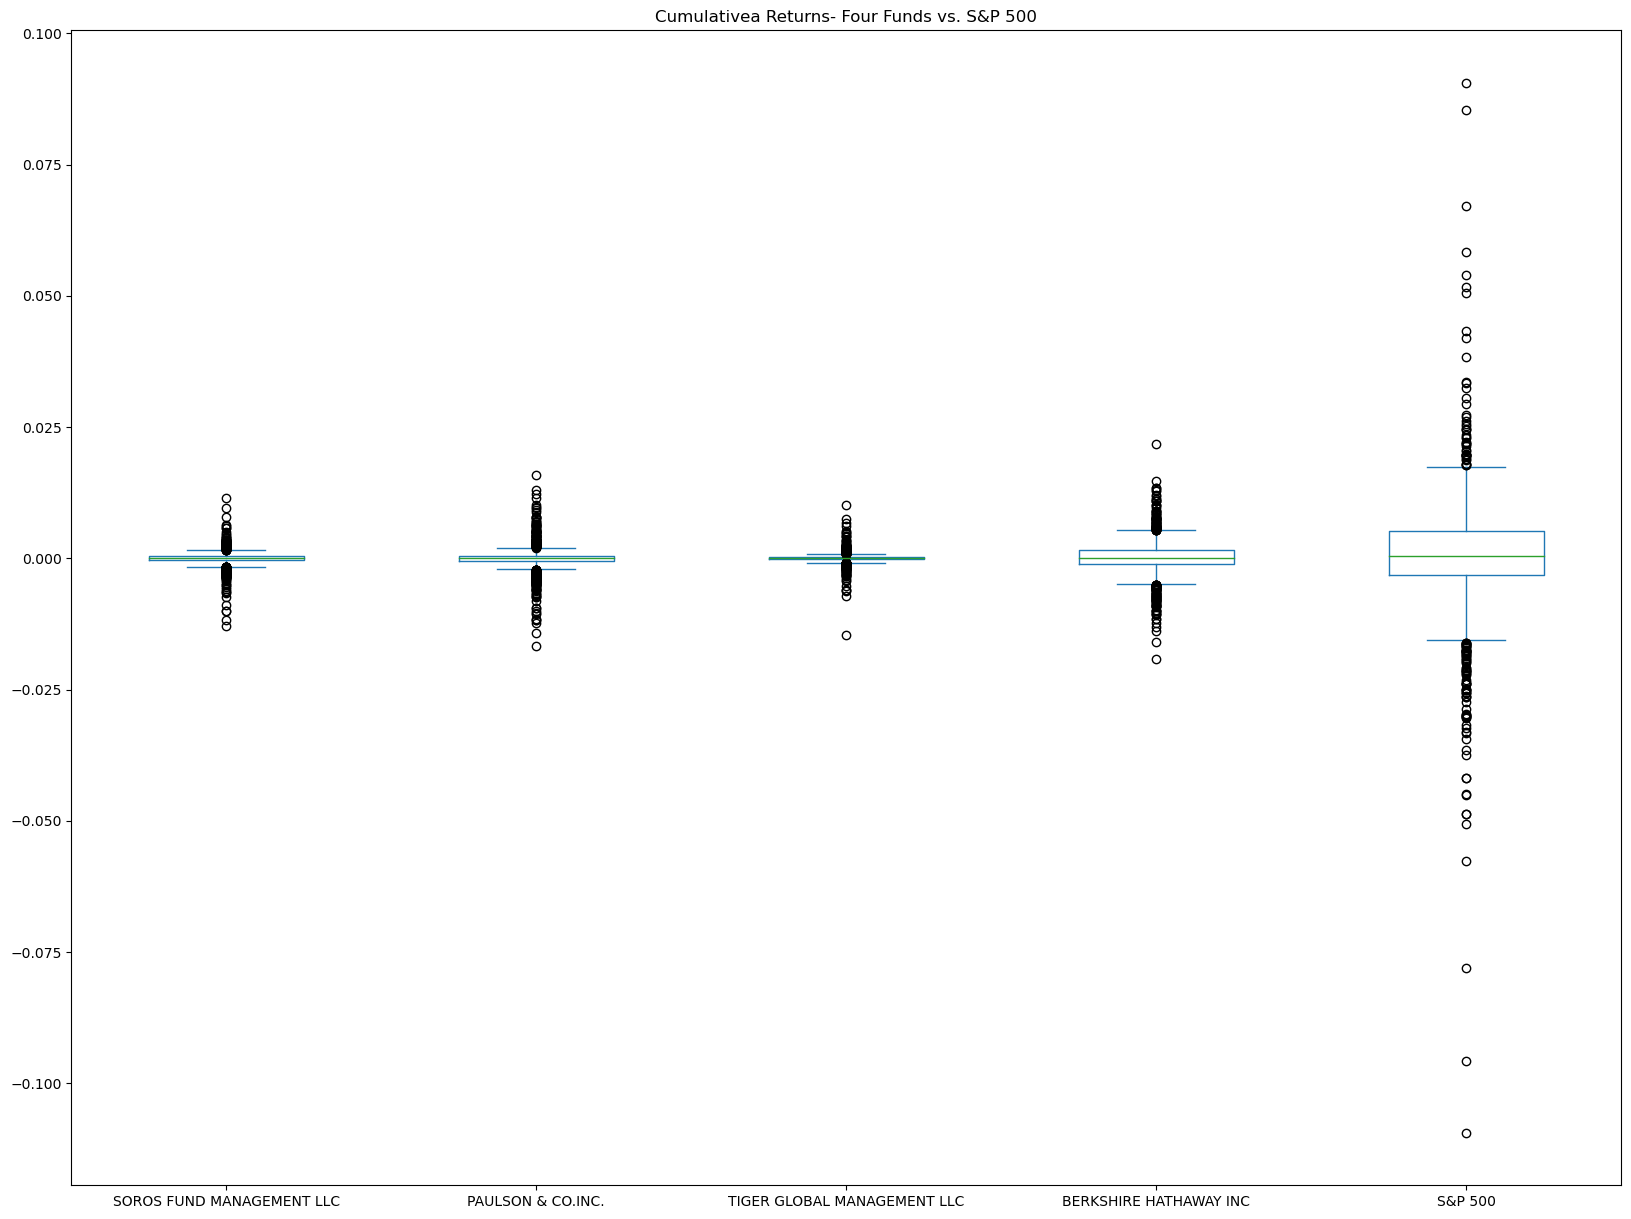

In [40]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(kind='box', legend=True, figsize=(20,15), title='Cumulativea Returns- Four Funds vs. S&P 500')

In [41]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size

# daily_returns['SOROS FUND MANAGEMENT LLC'].plot(kind='box', legend=True, figsize=(10,7), title='Cumulativea Returns- Four Funds vs. S&P 500', color='brown', label='Soros')
# daily_returns['PAULSON & CO.INC.'].plot(kind='box', legend=True,figsize=(10,7), color='pink', label='Paulson')
# daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(kind='box', legend=True,figsize=(10,7), color='yellow', label='Tiger')
# daily_returns['BERKSHIRE HATHAWAY INC'].plot(kind='box', legend=True,figsize=(10,7), color='red', label='Berkshire')
# daily_returns['S&P 500'].plot(kind='box', legend=True,figsize=(10,7), color='green', label='S&P 500')

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587


<AxesSubplot:title={'center':'Daily Returns- Four Funds'}>

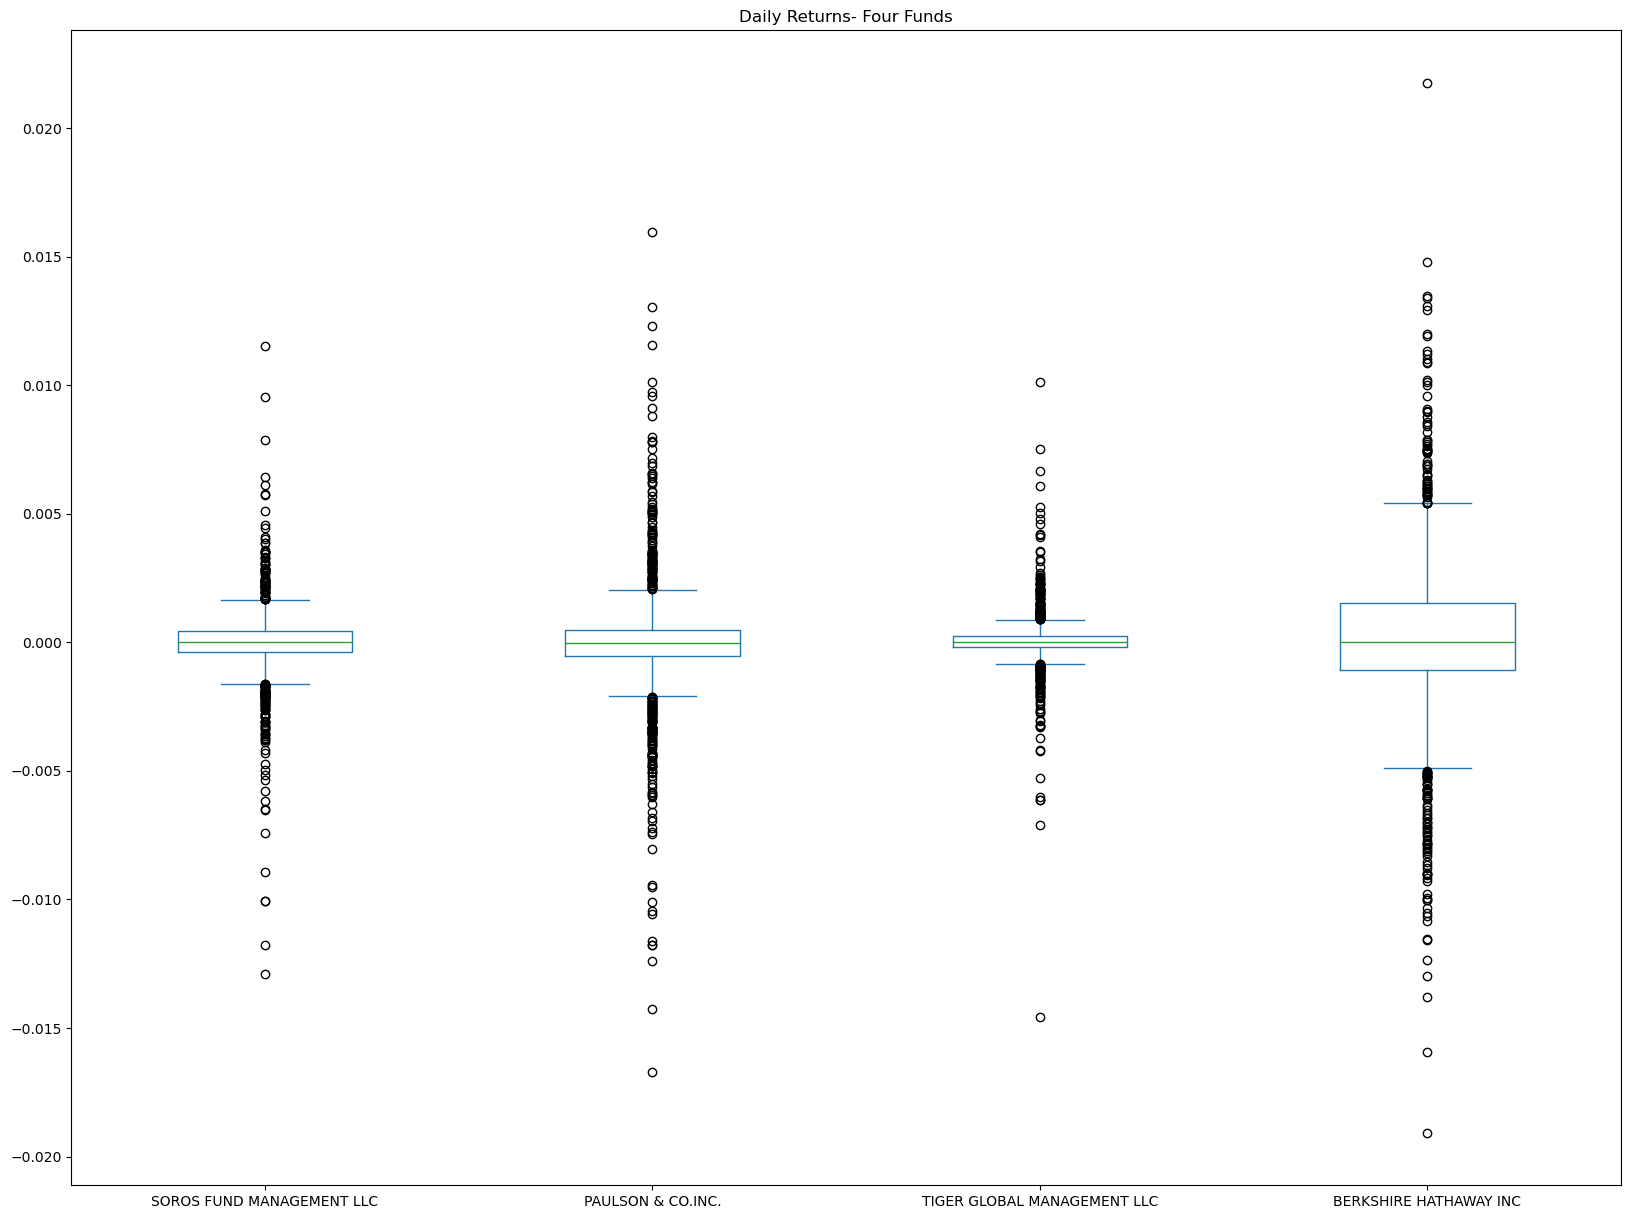

In [42]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
# df.drop(columns=['column_name'], inplace=True)
funds_daily_returns = daily_returns.drop(columns='S&P 500')
display(funds_daily_returns.head(4))
funds_daily_returns.plot(kind='box', legend=True, figsize=(20,15), title='Daily Returns- Four Funds')

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** 
### Based on the box plot visualization of just the four fund portfolios, the Berkshire Hathaway Inc fund was most volatile based on greatest spread, the Paulson & Co Inc fund was second by same criteria.  Tiger Global Management LLC showed the least volatility with the narrowest spread. 

## Limited Supplemental Preliminary Report

In [43]:
# Create a dictionary for each fund except the sp500
whale_navs_df

# slice each fund into individual dataframe and rename column 'NAV'
soros_df = whale_navs_df.loc[:,['SOROS FUND MANAGEMENT LLC']]
soros_df.columns = ['NAV']

paulson_df = whale_navs_df.loc[:,['PAULSON & CO.INC.']]
paulson_df.columns = ['NAV']

tiger_df = whale_navs_df.loc[:,['TIGER GLOBAL MANAGEMENT LLC']]
tiger_df.columns = ['NAV']

berkshire_df = whale_navs_df.loc[:,['BERKSHIRE HATHAWAY INC']]
berkshire_df.columns = ['NAV']

# create dictionary for each fund
funds_to_analyze = {
    'SOROS FUND MANAGEMENT LLC': soros_df,
    'PAULSON & CO.INC.': paulson_df,
    'TIGER GLOBAL MANAGEMENT LLC': tiger_df,
    'BERKSHIRE HATHAWAY INC': berkshire_df
}

SOROS FUND MANAGEMENT LLC

Recent Price Pct: -0.00041760930013567954
Mean Price Pct: -9.050559717789393e-06
Price Pct std. deviation: 0.0014045634222891834


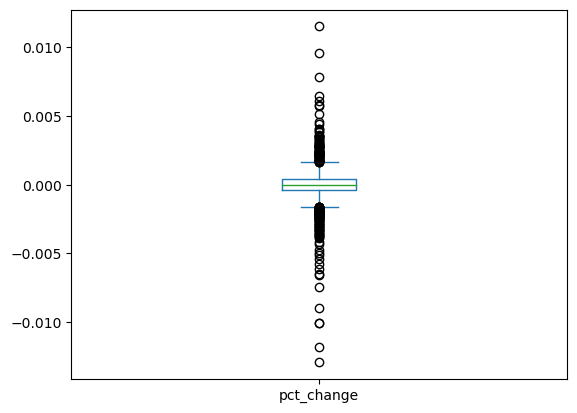



PAULSON & CO.INC.

Recent Price Pct: -0.0019303007663412641
Mean Price Pct: -2.6322703904776097e-05
Price Pct std. deviation: 0.0021992805651992477


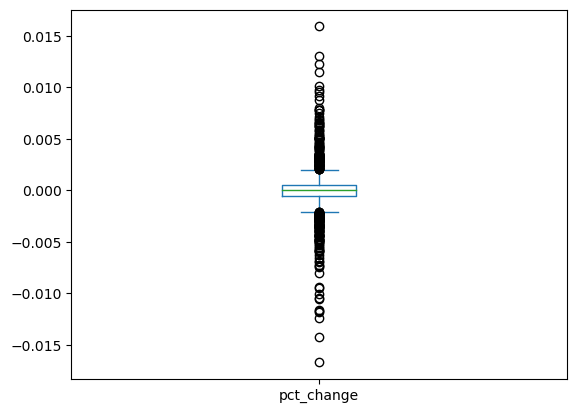



TIGER GLOBAL MANAGEMENT LLC

Recent Price Pct: -0.0004340322677218733
Mean Price Pct: 3.631268928244498e-05
Price Pct std. deviation: 0.0009955855703714846


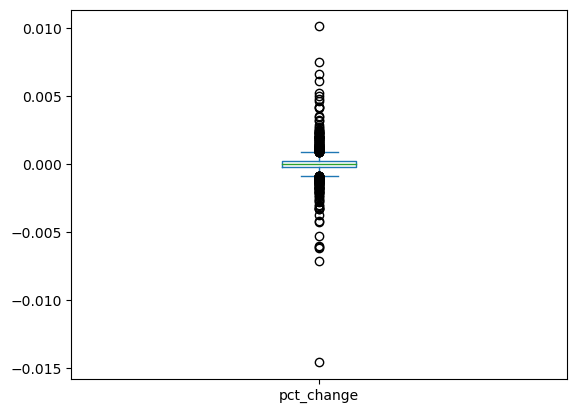



BERKSHIRE HATHAWAY INC

Recent Price Pct: -0.0010158227274680298
Mean Price Pct: 0.00014718205993834515
Price Pct std. deviation: 0.0032563102578335628


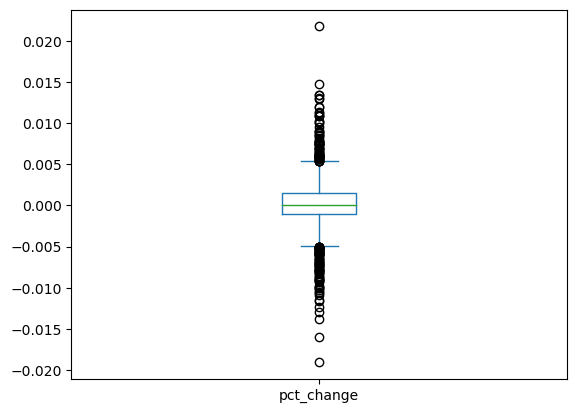

In [44]:
# Loop through the funds in the dictionary and compare their performance with the sp500.
for fund_name, dataframe in funds_to_analyze.items():

    # Calculate the daily percent change for each fund
    dataframe['pct_change'] = dataframe['NAV'].pct_change()
    dataframe = dataframe.dropna()
    dataframe.head()

    # Get most recent price
    fund_price = dataframe['pct_change'][-1]

    # Calculate the mean price percent change
    fund_mean = dataframe['pct_change'].mean()
    
    # Calculate the standard deviation of the percent change
    fund_std = dataframe['pct_change'].std()
    
    # Print the fund name and calculated statistics
    print(f"{fund_name}\n")
    print(f"Recent Price Pct: {fund_price}")
    print(f"Mean Price Pct: {fund_mean}")
    print(f"Price Pct std. deviation: {fund_std}")

    dataframe["pct_change"].plot.box()
    plt.show()
    print("\n")

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

### Standard deviation
  $\sigma = \sqrt{S^{2}}$

The square root of the variance

In [12]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500

#   soros_std = daily_returns['SOROS FUND MANAGEMENT LLC'].std()
#   paulson_std = daily_returns['PAULSON & CO.INC.'].std()
#   tiger_std = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].std()
#   berkshire_std = daily_returns['BERKSHIRE HATHAWAY INC'].std()
#   sp500_std = daily_returns['S&P 500'].std()

daily_returns_std=daily_returns.std().sort_values()

# Review the standard deviations sorted smallest to largest
display(daily_returns_std)

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [31]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
trade_days_year=252

# Review the annual standard deviations smallest to largest
annualized_std=(daily_returns_std*np.sqrt(trade_days_year)).sort_values()
display(annualized_std)

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Four Funds vs. S&P 500 - 21 Day Rolling STD'}, xlabel='date'>

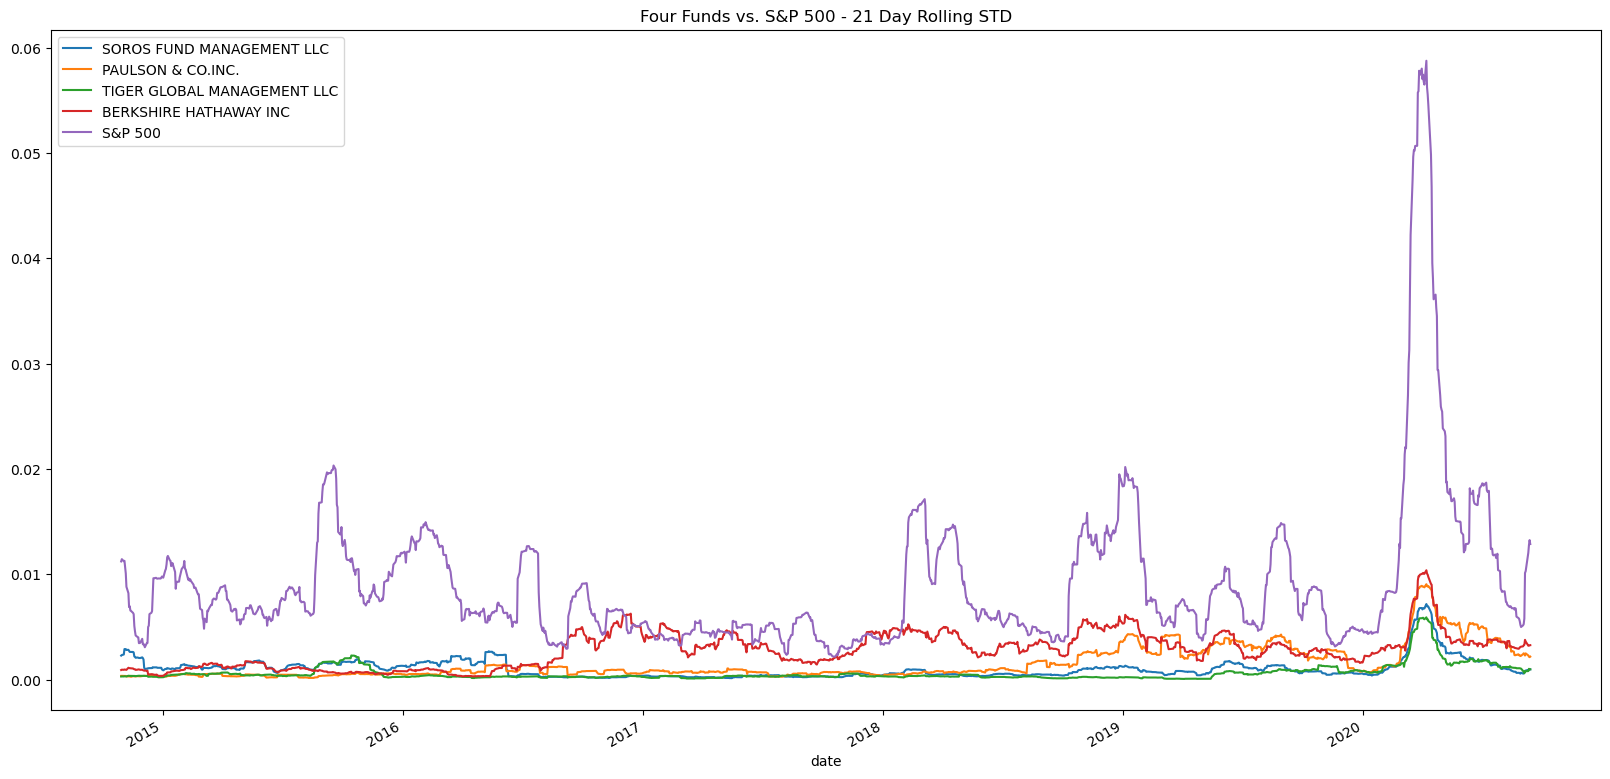

In [14]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size

daily_returns.rolling(window=21).std().plot(legend=True, figsize=(20,10), title='Four Funds vs. S&P 500 - 21 Day Rolling STD')

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Four Funds 21 Day Rolling STD'}, xlabel='date'>

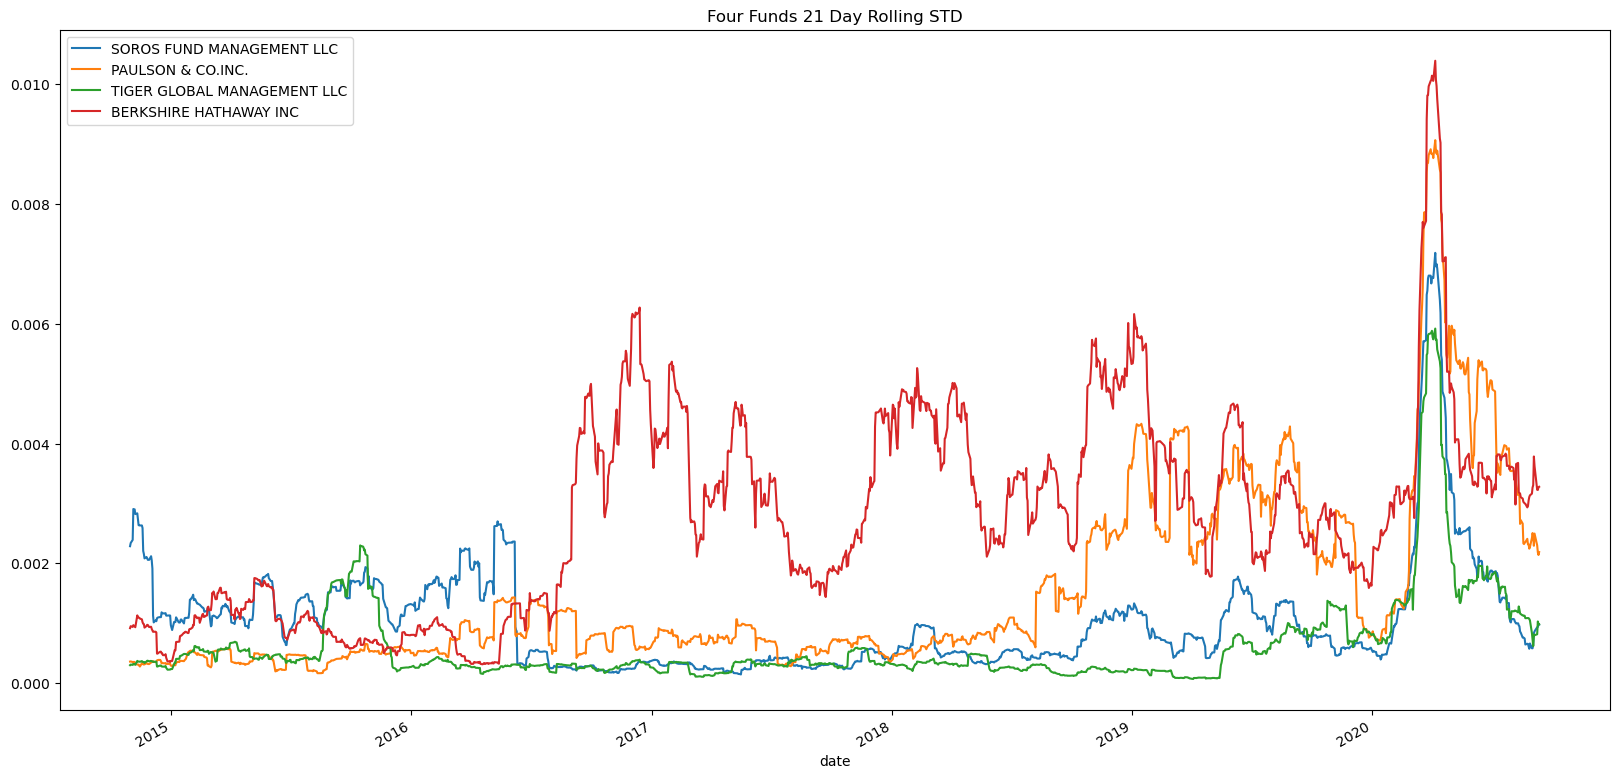

In [15]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
funds_daily_returns.rolling(window=21).std().plot(legend=True, figsize=(20,10), title='Four Funds 21 Day Rolling STD')

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** 
### None.  Based on the annualized standard deviation, all four funds have smaller standard deviations when compared to S&P500.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** 
### Generally not.  From start of dataset to end of 2017 / start 2018, there does not appear to be synchronicity with S&P 500.  However, Berkshire Hathaway has some degree of relative rise in std coinciding with S&P500 starting around last quarter of 2016 and continuing until about the third quarter of 2017.  Then around last quarter of 2018 there is grossly similar rise in std of all funds coinciding with S&P500 with exception of Tiger Global Management which is generally flat.  Finally, starting 2020, all four funds seem to show synchronized rise in std relative to S&P500.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** 
### Berkshire Hathaway consistently shows greatest std after mid 2016.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

### Mean
   - $\mu = \frac{\sum{x_{i}}}{n}$

The average value for a given `list` or `Series`

In [32]:
# Calculate the annual average return data for the four fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
annual_average_returns=(daily_returns.mean()*trade_days_year).sort_values()
display(annual_average_returns)

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

### Sharpe Ratio
  - $\frac{R_{p}}{\sigma_{p}}$

The ratio between the average annual return and the annualized standard deviation.

In [33]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios= annual_average_returns / (daily_returns.std()*np.sqrt(trade_days_year))
sharpe_ratios=sharpe_ratios.sort_values()
display(sharpe_ratios)

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Four Funds vs. S&P 500 - Sharpe Ratios'}>

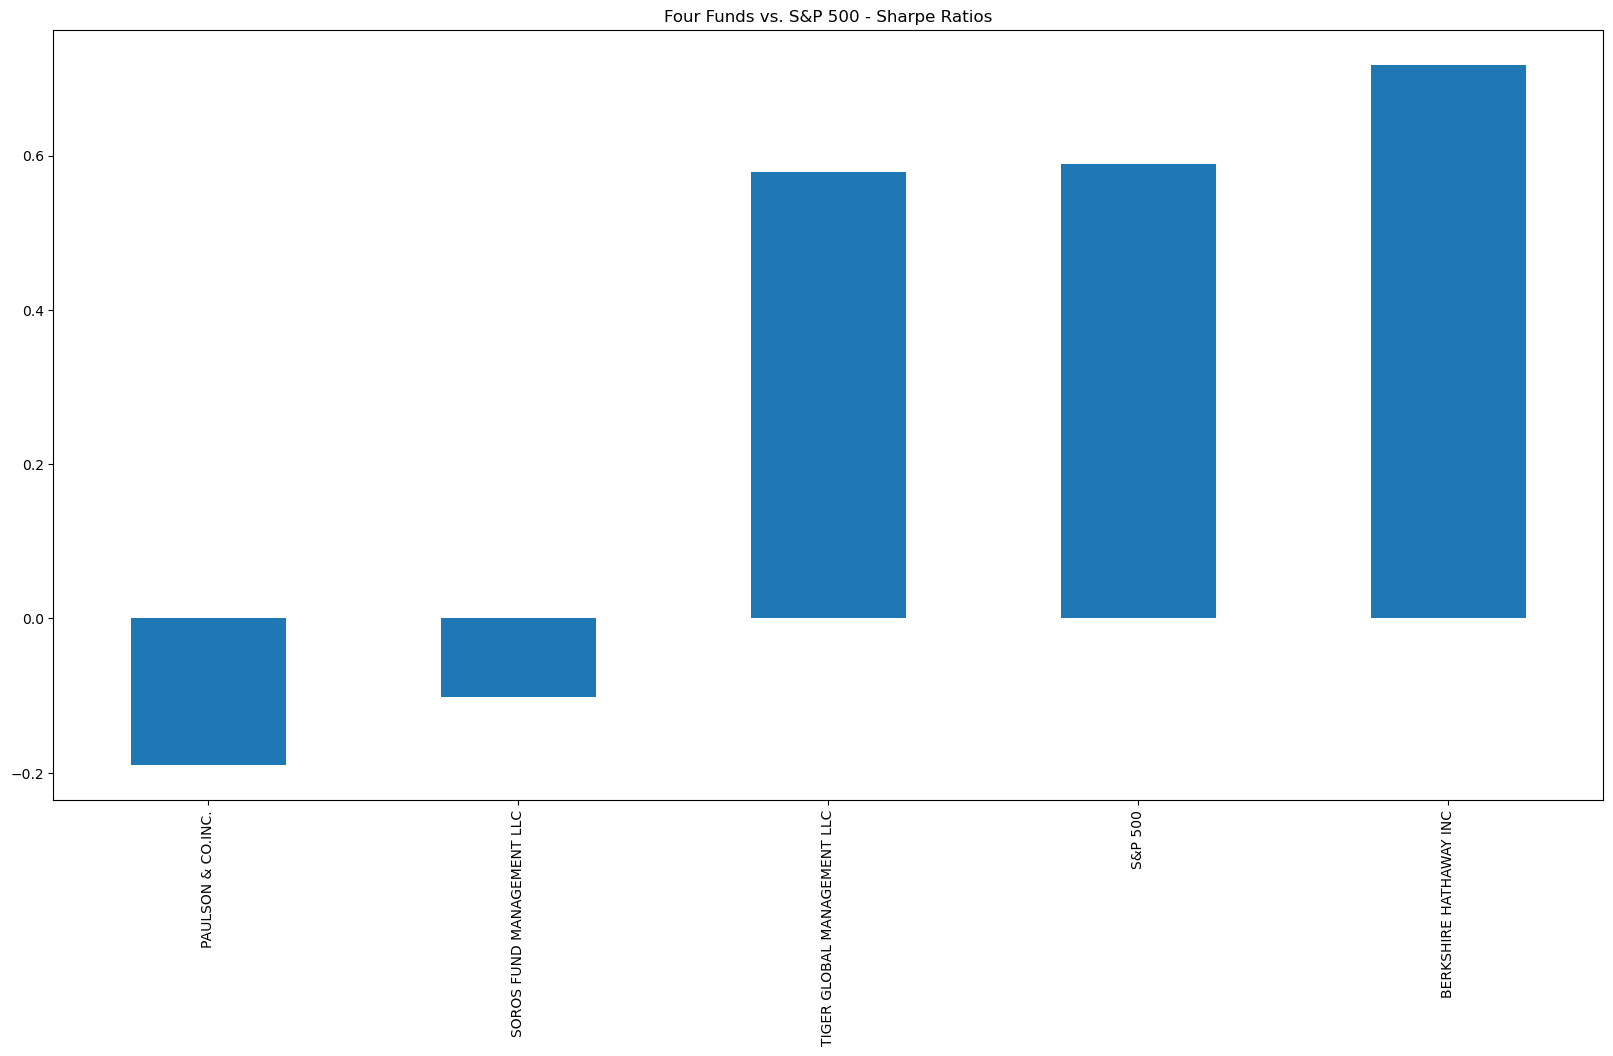

In [18]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot.bar(figsize=(20,10), title='Four Funds vs. S&P 500 - Sharpe Ratios')

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** 
### Berkshire Hathaway Inc has the greatest Sharpe ratio and thus the best risk-return profile.  Paulson & Co Inc has the worst.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

### Variance
   - ${S}^2 = \frac{\sum{ (x_{i} - \mu })^{2}}{ n - 1}$

The squared average change around the mean

In [49]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_variance = daily_returns['S&P 500'].rolling(window=60).var().dropna()
display(sp500_variance.tail())

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [19]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_df = daily_returns.loc[:,['S&P 500']]
sp500_var = sp500_df.rolling(window=60).var().dropna()
display(sp500_var.tail())

,S&P 500
date,
2020-09-04,0.000103
2020-09-08,0.000116
2020-09-09,0.000120
2020-09-10,0.000121
2020-09-11,0.000120


#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [20]:
# choose two portfolios that you’re most likely to recommend as investment options
berkshire_returns=daily_returns.loc[:,['BERKSHIRE HATHAWAY INC']]
tiger_returns=daily_returns.loc[:,['TIGER GLOBAL MANAGEMENT LLC']]
display(berkshire_returns.head())
print('\n')
display(tiger_returns.head())

,BERKSHIRE HATHAWAY INC
date,
2014-10-02,0.000171
2014-10-03,0.001248
2014-10-06,0.000267
2014-10-07,-0.000587
2014-10-08,0.000842


,TIGER GLOBAL MANAGEMENT LLC
date,
2014-10-02,0.000013
2014-10-03,0.000394
2014-10-06,0.000066
2014-10-07,-0.000208
2014-10-08,0.000242


##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [58]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
berkshire_roll_60_cov = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])
display(berkshire_roll_60_cov.tail())

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [55]:
# Calculate the S&P 500 60-day rolling variance
sp500_roll_60_variance = daily_returns['S&P 500'].rolling(window=60).var()

In [59]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
berkshire_roll_60_beta = berkshire_roll_60_cov / sp500_roll_60_variance
display(berkshire_roll_60_beta.tail())

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC - 60 Day Rolling Beta'}, xlabel='date'>

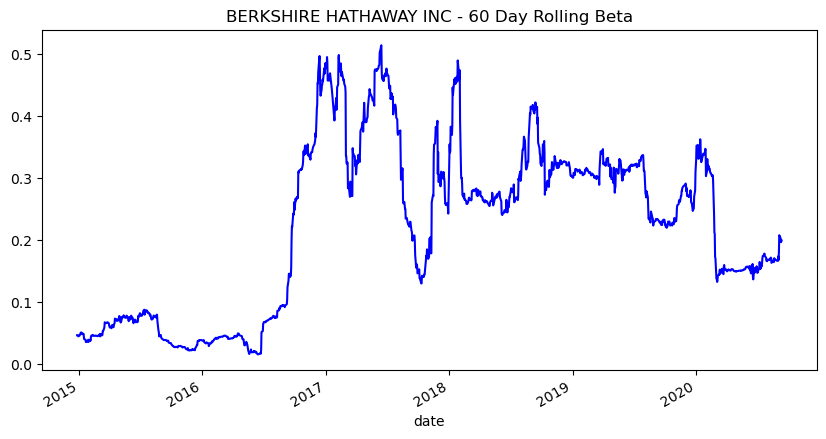

In [67]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# Plot the daily returns
berkshire_roll_60_beta.plot(
    figsize=(10,5),
    title='BERKSHIRE HATHAWAY INC - 60 Day Rolling Beta',
    color='blue'
)

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [60]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_roll_60_cov = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
display(tiger_roll_60_cov.tail())

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [61]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_roll_60_beta = tiger_roll_60_cov / sp500_roll_60_variance
display(tiger_roll_60_beta.tail())

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [27]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC - 60 Day Rolling Beta'}, xlabel='date'>

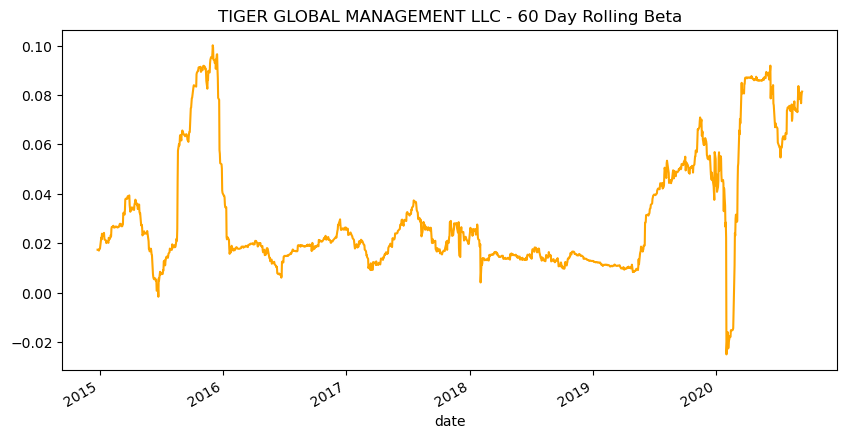

In [68]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_roll_60_beta.plot(
    figsize=(10,5),
    title='TIGER GLOBAL MANAGEMENT LLC - 60 Day Rolling Beta',
    color='orange'
)

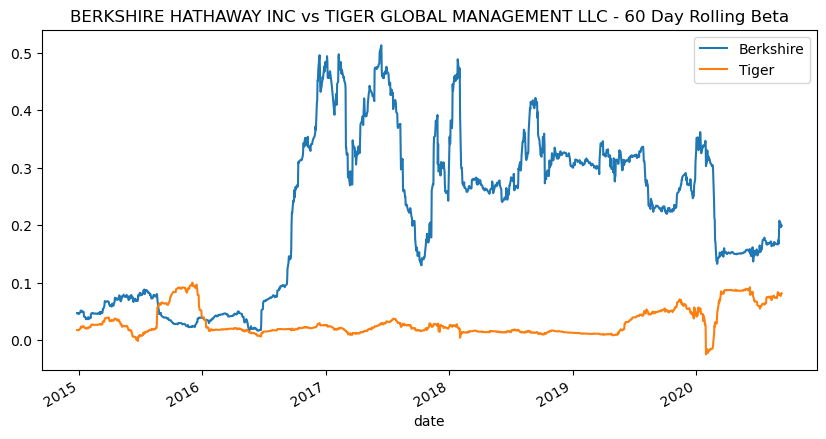

In [66]:
# Set figure of the BERKSHIRE HATHAWAY INC 60-day rolling Beta
ax = berkshire_roll_60_beta.plot(
    figsize=(10,5),
    title='BERKSHIRE HATHAWAY INC vs TIGER GLOBAL MANAGEMENT LLC - 60 Day Rolling Beta',
)

# Plot TIGER GLOBAL MANAGEMENT LLC 60-day rolling Beta on the same figure
tiger_roll_60_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(['Berkshire', 'Tiger'])

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---